In [17]:
import pandas as pd
import urllib.request
import urllib
import urllib.parse 

%matplotlib inline
from matplotlib import pylab as plt
from PIL import Image


In [43]:
def reformat_image(file_name, save_name):
    img = Image.open(file_name)
    half_the_width = int(img.size[0] / 2)
    half_the_height =int(img.size[1] / 2)
    min_size = half_the_width
    if min_size > half_the_height:
        min_size = half_the_height

    half_mini_size = int(min_size)

    img = img.crop(
        (
            half_the_width - half_mini_size,
            half_the_height - half_mini_size,
            half_the_width + half_mini_size,
            half_the_height + half_mini_size
        )
    )
    img = img.resize((128,128))
    img.save(save_name)
    plt.imshow( img )

In [32]:
import requests

def download_image(text):
    url = 'https://api.flickr.com/services/rest/'
    API_KEY = ""

    payload = {
        'method': 'flickr.photos.search',
        'api_key': API_KEY,
#         'text': text,
        'tags': text,
        'per_page': '50',
        'format': 'json',
        'nojsoncallback': '1',
        'privacy_filter' : '1',
        'content_type': '1',
        }

    r = requests.get(url, params=urllib.parse.urlencode(payload))

    resp = r.json()
    tpl_url = 'https://farm%s.staticflickr.com/%s/%s_%s.jpg'
    count = 1
    for i in resp['photos']['photo']:
        img_url = tpl_url % (i['farm'],i['server'],i['id'],i['secret'])
        r = requests.get(img_url)
        fname = "downloaded_image/"+text+"_%04d.jpg" % count
        f = open(fname, 'wb')
        f.write(r.content)
        f.close()

        count += 1

In [41]:
download_image("綾瀬はるか")

In [39]:
celebrity_names = [
    "ベッキー",
    "石原さとみ",
    "新垣結衣",
    "和田アキ子",
    "佐藤ひなこ",
    "有村架純",
    "広瀬すず",
    "前田敦子",
    "大島優子",
    "山本彩",
    "深田恭子",
]

In [40]:
for name in celebrity_names:
    download_image(name)

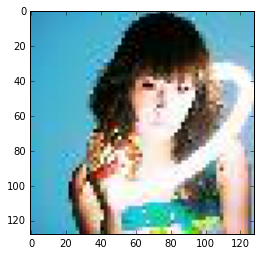

In [45]:
from os.path import join, relpath
from glob import glob
path = 'downloaded_image'
files = [relpath(x, path) for x in glob(join(path, '*'))]
for file in files:
    reformat_image(path+"/"+file, "square_image/"+file)